In [80]:
import os
import hikinggc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
import datetime
import gpxpy
from matplotlib.colors import LightSource
import matplotlib as mpl
lpcoords = (-18.0725, -17.6983, 28.4385, 28.8591)
from scipy.interpolate import RegularGridInterpolator
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)
plt.style.use('dark_background')

In [36]:
datadir = "../data/"
earthquake = os.path.join(datadir, "earthquake/catalogoComunSV_1632492892997.csv")
topofile = os.path.join(datadir, 'topography/136_MDT25_LP_proj.tif')
gpxfile = "/data/GPX/LaPalma/transvulcania-2022b.gpx"
figdir = "../figures/"

## Read topography

In [43]:
topography = hikinggc.Topography()
topography.read_geotiff(topofile)

### Read GPX

In [39]:
def read_gpx(filename):
    with open(filename, "r") as gf:
        gpx = gpxpy.parse(gf)
        lon = []
        lat = []
        ele = []
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lon.append(point.longitude)
                    lat.append(point.latitude)
                    ele.append(point.elevation)
    return lon, lat, ele

lon2022, lat2022, ele2022 = read_gpx(gpxfile)

### Create interpolator

In [69]:
long = topography.lon[0]
latg = np.flipud([llons[0] for llons in topography.lat])
interp = RegularGridInterpolator((long, latg), np.flipud(topography.image).T)

### Perform interpolation 
The coordinates need to be stored as an array of couples.

In [74]:
coords = [(a_, b_) for a_, b_ in zip(lon2022, lat2022)]
ele_interp = interp(coords)

## Plots

In [110]:
distance_array = [hikinggc.distance.distance(coords[ii], coords[ii+1]).km for ii in range(0, len(coords)-1)]
distance_array.insert(0, 0.0)
dist = np.cumsum(distance_array)

#### Compute max altitude

In [ ]:
maxele = np.max(ele_interp)


Text(0.5, 0, 'Distance from start\n(km)')

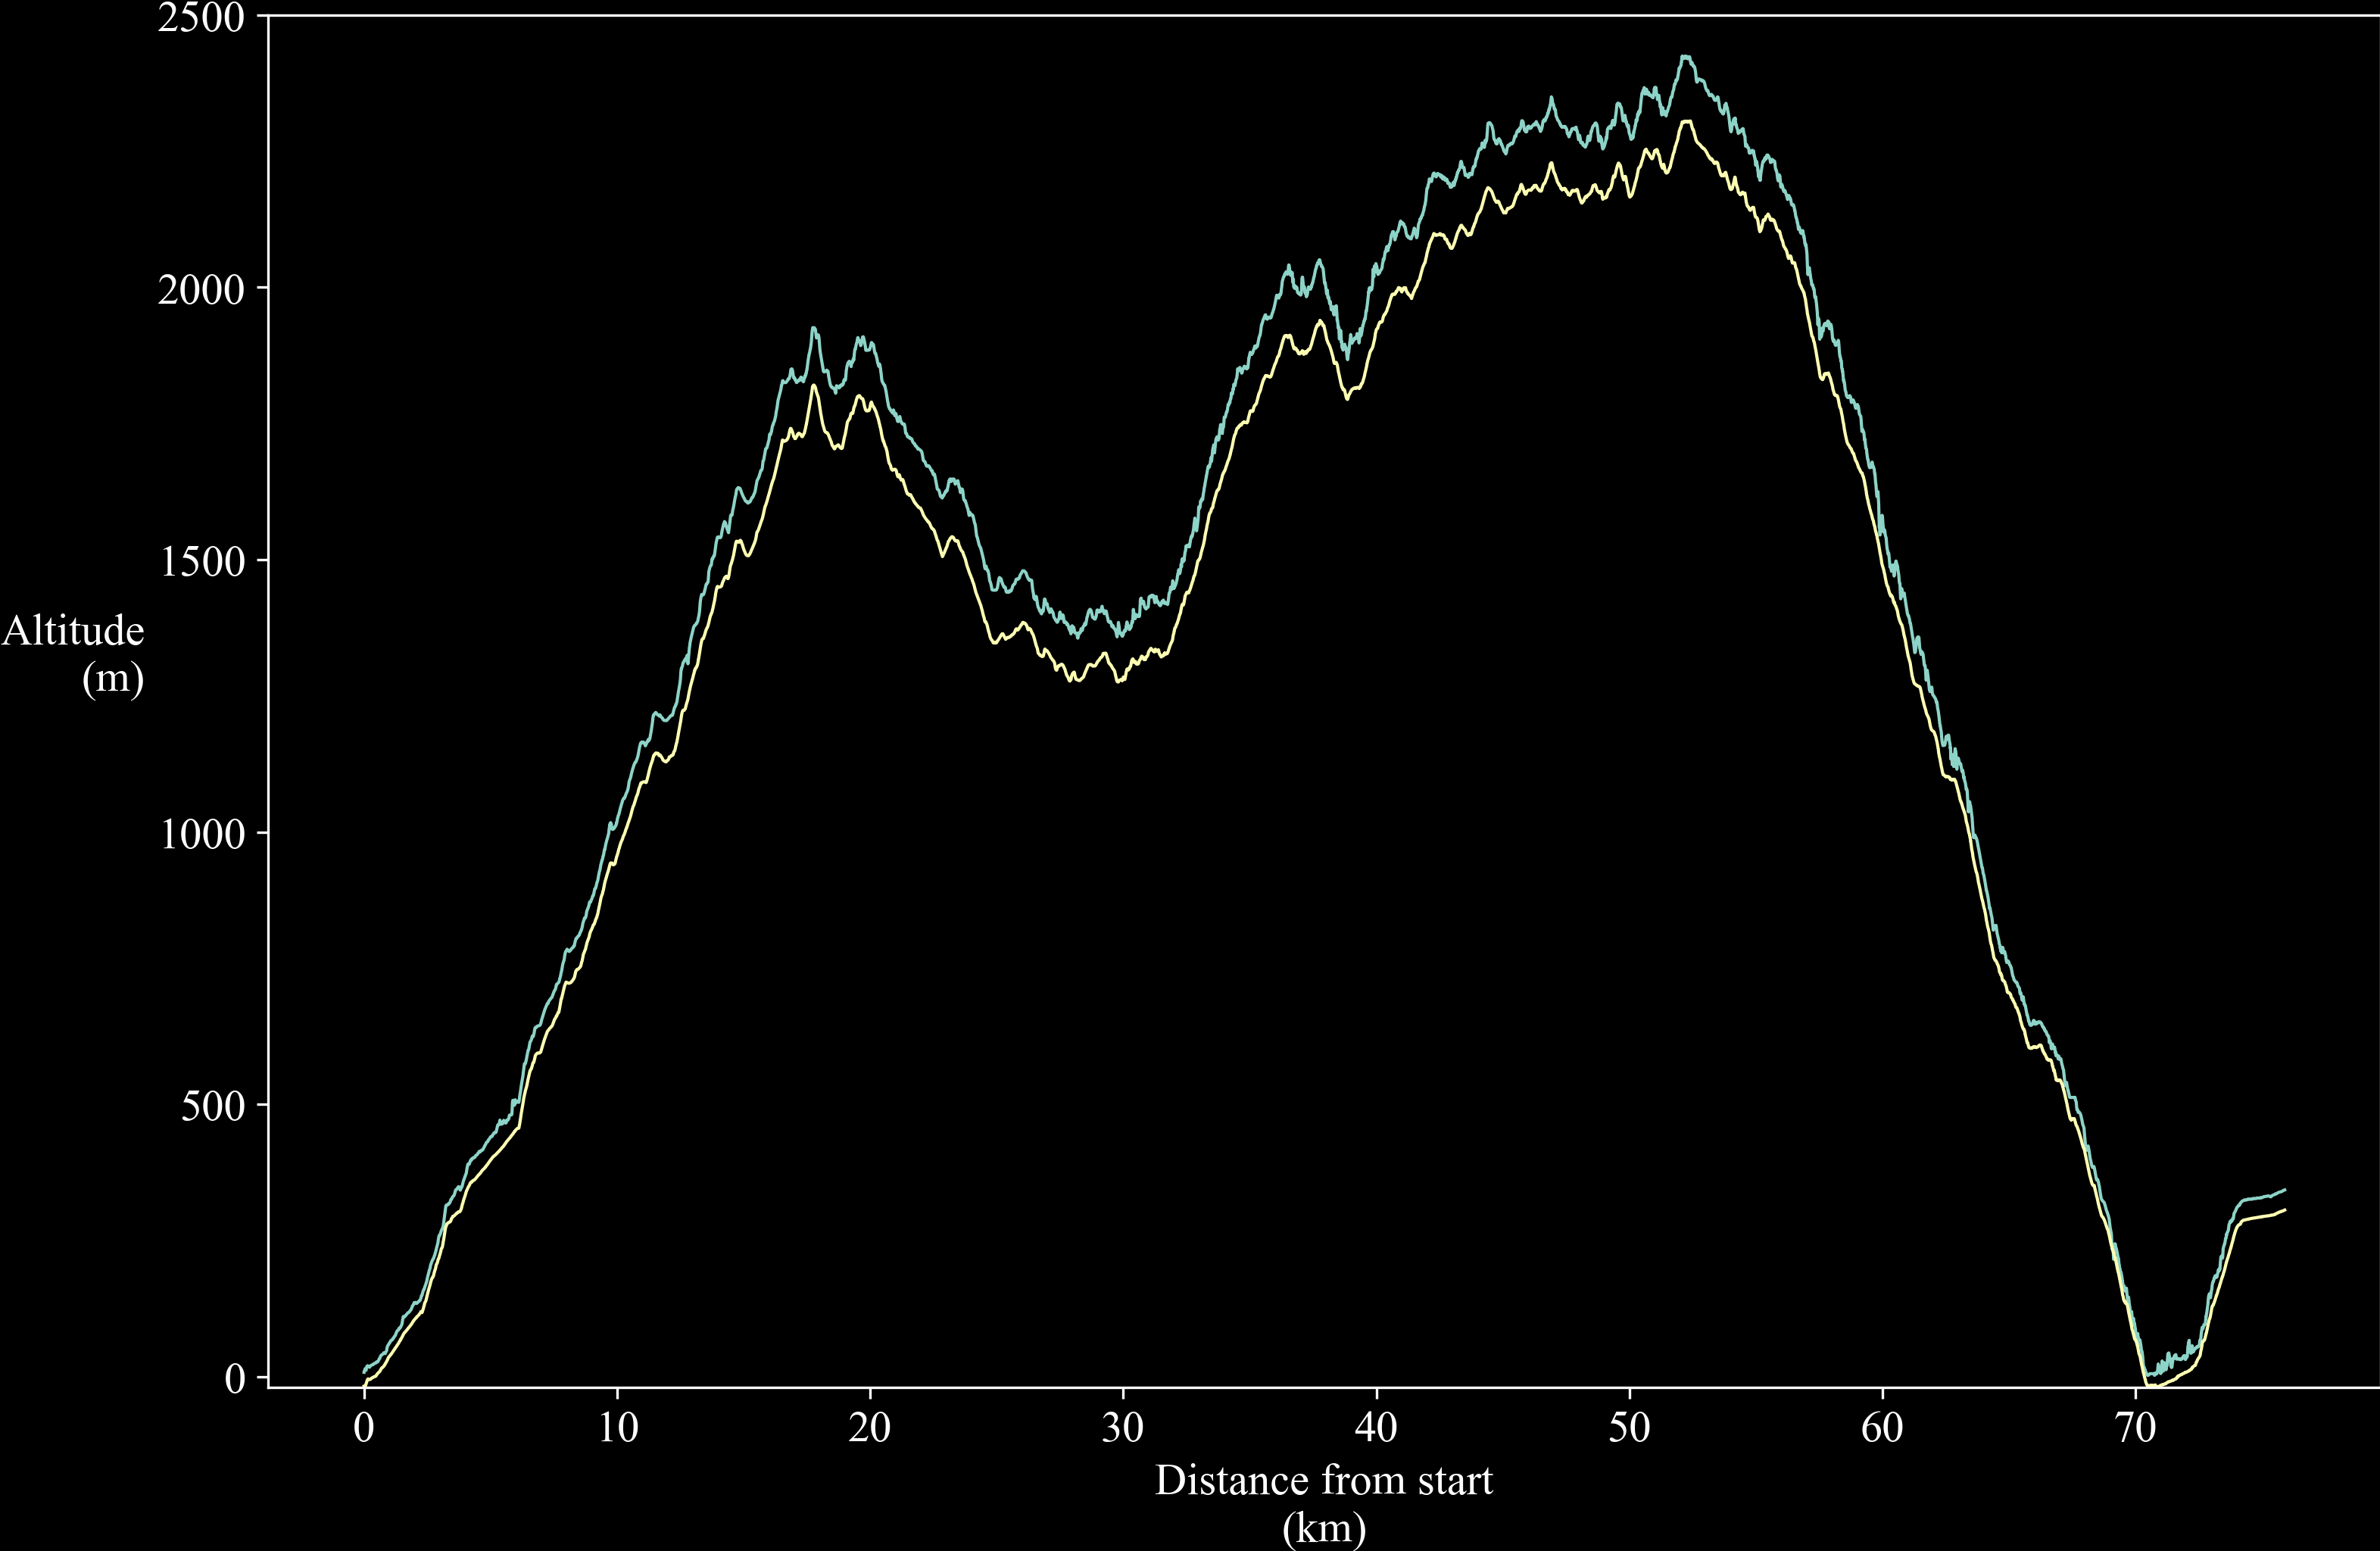

In [111]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(dist, ele_interp)
ax.plot(dist, ele2022)
ax.set_ylim(-20, 2500)
ax.set_ylabel("Altitude\n(m)", rotation=0, ha="right")
ax.set_xlabel("Distance from start\n(km)", rotation=0)
ax.plot(np.arg)

Text(0.5, 0, 'Distance from start\n(km)')

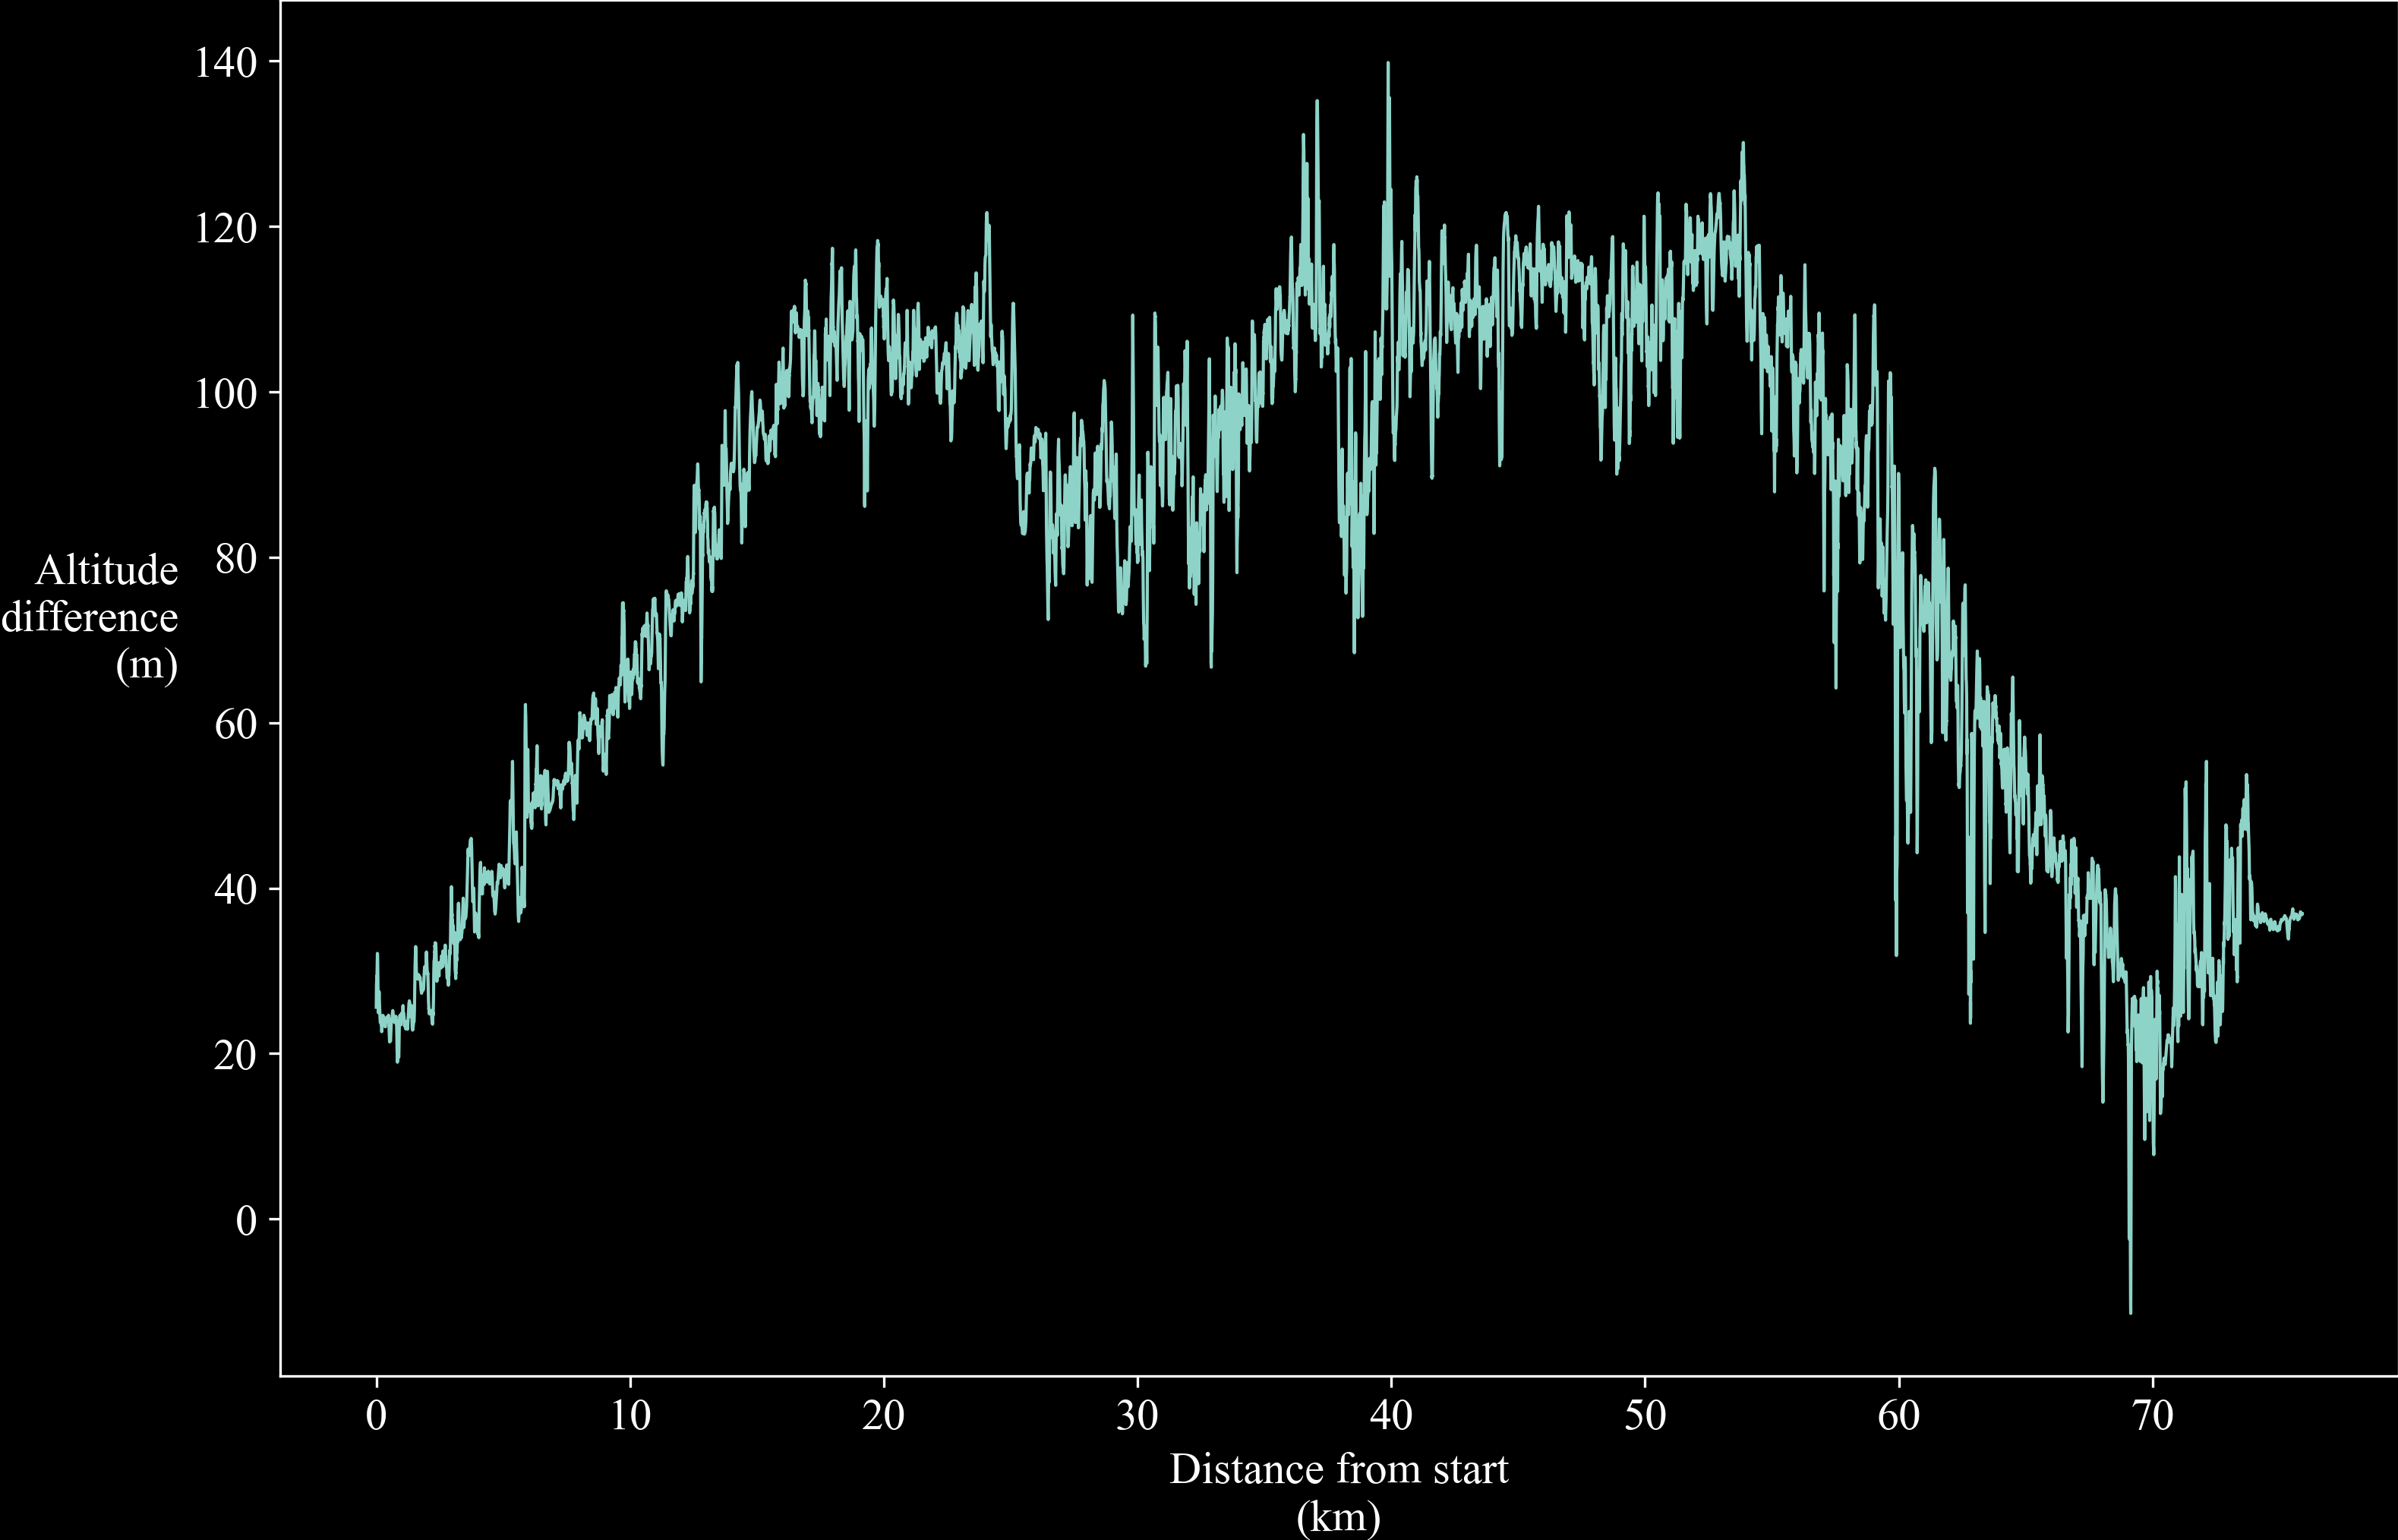

In [112]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(dist, ele_interp - ele2022)
ax.set_ylabel("Altitude\ndifference\n(m)", rotation=0, ha="right")
ax.set_xlabel("Distance\n(km)", rotation=0)

In [114]:
np.max(ele_interp), np.max(ele2022)

(2424.738845267467, 2305.617)